In [1]:
import pandas as pd
import string
import numpy as np
import matplotlib.pyplot as plt
from utils import columns, dates,metrics, get_data_pred
from sklearn.model_selection import train_test_split
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import cross_val_score
from utils import columns

In [2]:
df = pd.read_csv('../data/united_oats.csv', index_col=0)

In [3]:
X = df.dropna().drop('Oat_Yield', axis=1)
y = df.dropna()['Oat_Yield']
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [4]:
reg = LinearRegression().fit(X_train, y_train)
reg.score(X_test, y_test)

-1.4273656462495358e+23

In [5]:
mean_squared_error(y_test, reg.predict(X_test))

2.806538364182909e+25

In [6]:
reg = MLPRegressor(max_iter=500).fit(X_train, y_train)
reg.score(X_test, y_test)

0.3449447899266963

In [7]:
mean_squared_error(y_test, reg.predict(X_test))

128.79934322079245

In [8]:
cross_val_score(reg, X, y, cv=5).mean()

0.2417563291064737

In [9]:
y = df['Oat_Yield']
X = df.drop(columns=['Oat_Yield'], axis=1)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=1)

In [11]:
reg = HistGradientBoostingRegressor().fit(X_train, y_train)

In [12]:
mse = mean_squared_error(y_test, reg.predict(X_test))
mse

145.34831128995063

In [13]:
res_y_test = reg.predict(X_test)
reg.score(X,y)

0.8515785868033359

In [14]:
cross_val_score(reg, X, y, cv=5).mean()

0.47008809899705445

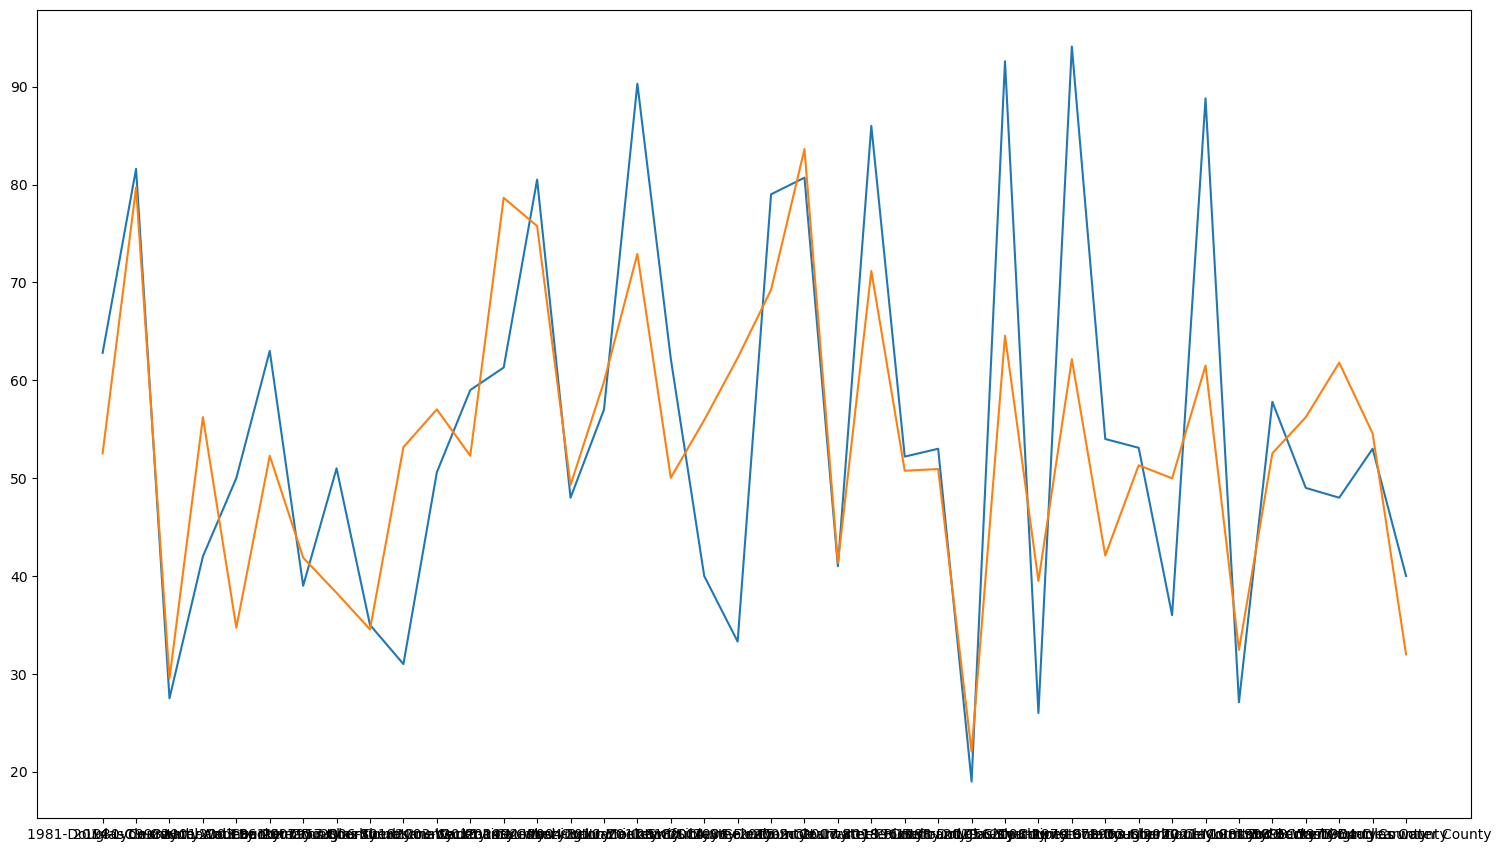

In [15]:
plt.plot(y_test[:40])
plt.plot(res_y_test[:40])
fig = plt.get_current_fig_manager()
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)

In [16]:
from lightgbm import LGBMRegressor, plot_importance

In [17]:
reg = LGBMRegressor().fit(X_train, y_train)

In [18]:
mse = mean_squared_error(y_test, reg.predict(X_test))
mse

146.52168193907852

In [19]:
res_y_test = reg.predict(X_test)
reg.score(X,y)

0.8508986569827889

In [21]:
fi = reg.feature_importances_
np.argwhere(fi > 15)
columns[np.argwhere(fi > 10)]

array([['01-21-avg'],
       ['01-28-min'],
       ['02-10-avg'],
       ['02-15-max'],
       ['03-07-min'],
       ['03-10-avg'],
       ['04-12-avg'],
       ['04-15-min'],
       ['04-17-min'],
       ['05-26-min'],
       ['05-30-max'],
       ['06-19-min'],
       ['07-07-max'],
       ['07-24-min'],
       ['07-26-max'],
       ['08-09-min'],
       ['09-08-min'],
       ['09-12-avg'],
       ['09-12-min'],
       ['09-13-min'],
       ['09-13-max'],
       ['09-15-avg'],
       ['09-16-avg'],
       ['09-21-max'],
       ['09-23-avg'],
       ['09-23-max'],
       ['09-24-min'],
       ['09-28-min']], dtype='<U10')

In [22]:
cross_val_score(reg, X, y, cv=5).mean()

0.4838700998733767

In [23]:
res = reg.predict(get_data_pred('ACAvNTuEuFWcmwms'))
res

array([55.65504535, 40.34790469, 54.81078882, 58.11712281, 52.09356344,
       46.36535028, 54.48957916, 51.1139742 , 46.3380958 , 63.81940198,
       69.94063453, 55.35914837, 54.32136007, 53.30873938, 57.26291504,
       45.03311344, 44.84098699])

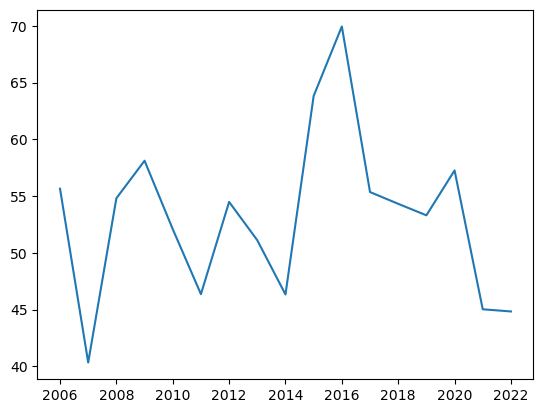

In [24]:
plt.plot( range(2006,2023), res)

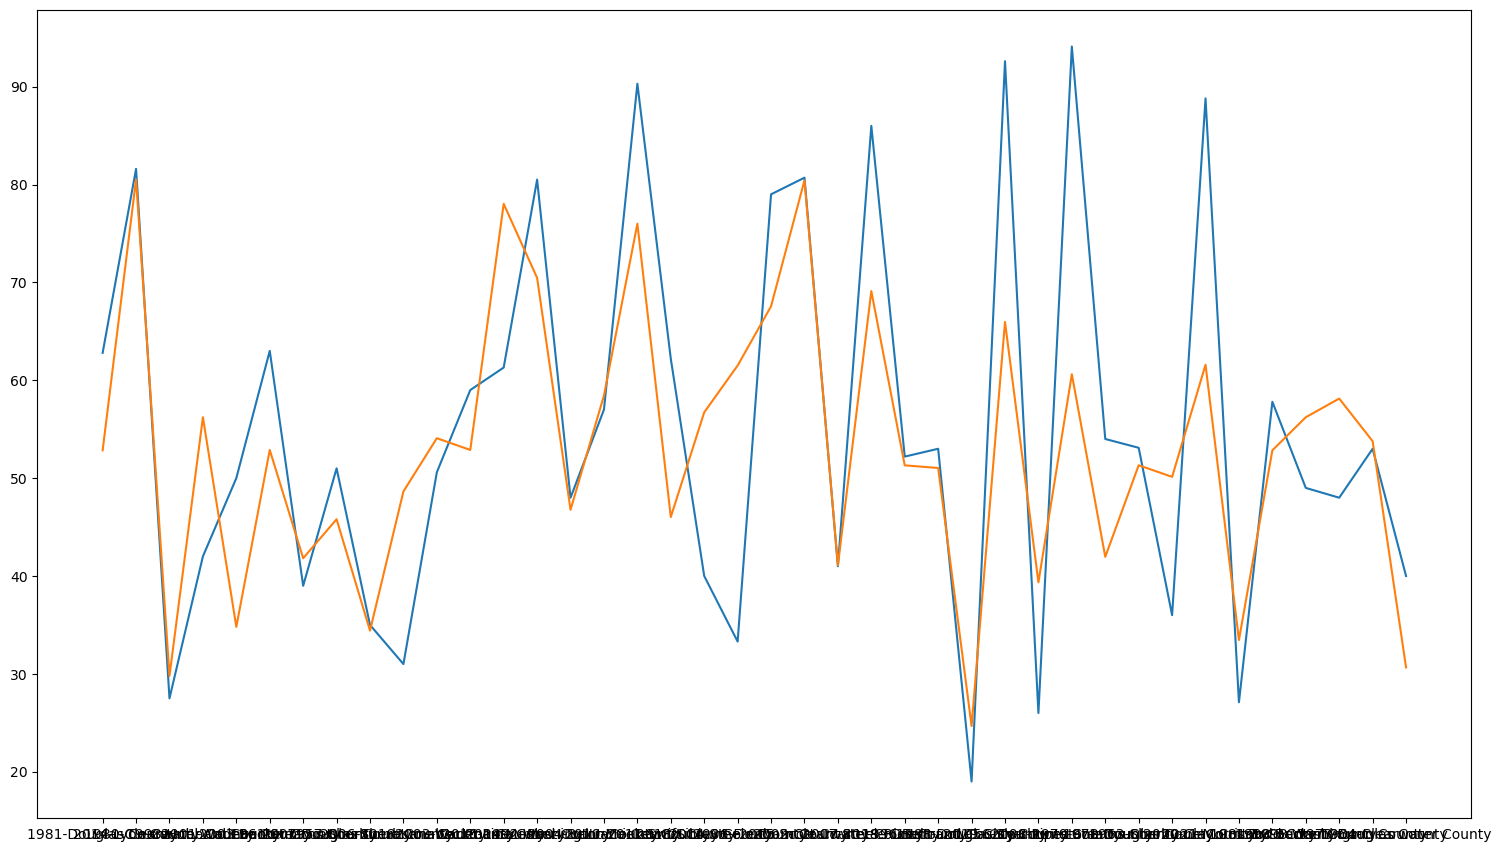

In [25]:
plt.plot(y_test[:40])
plt.plot(res_y_test[:40])
fig = plt.get_current_fig_manager()
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)